# Final Project
## By: Meir Naiman
### The goal of this project is to look at crime statistics over the past 25 years to see if overall crime has been declining or not. My presumptions going into the assignment is that crime is indeed declining, but we will see what the project shows. 

## Step #1
### Import dependencies

In [25]:
import pandas as pd
import requests, json
import matplotlib.pyplot as plt
import seaborn as sns

## Step #2
### Pull Violent Crime Data from FBI API endpoints. We can't pull all data at once so first we pull the homicide data and then we pull the rape statistics. Unfortunately, these were the only two endpoints that I had any success working with. The other endpoints gave me 400 errors. 

In [26]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/nibrs/homicide/victim/national/count?API_KEY=DuwblJOX8ESH7AwHc2GwpdBQQuvVteK9zBRK1cxj'
r = requests.get(url)
df = pd.DataFrame(r.json()['data'])
df = df.sort_values(by=['data_year'])
df["type"] = "Homicide"
df

url = 'https://api.usa.gov/crime/fbi/sapi/api/nibrs/rape/victim/national/count?API_KEY=DuwblJOX8ESH7AwHc2GwpdBQQuvVteK9zBRK1cxj'
r = requests.get(url)
dfR = pd.DataFrame(r.json()['data'])
dfR = dfR.sort_values(by=['data_year'])
dfR["type"] = "Rape"

## Step #3 
### Then we combine the two dataframes together.

In [27]:
frames = [df, dfR]
result = pd.concat(frames)

## Step #4
### Then we display the data in a line chart. Because the Rape counts are so much higher than homicides, the chart really flattens the ups and downs of the homicide statistics.

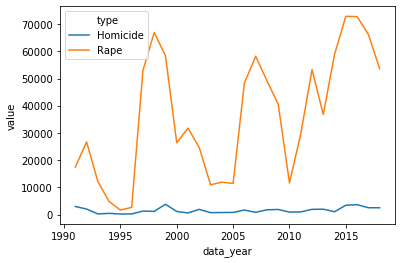

In [28]:
sns.lineplot(y="value", x="data_year", hue='type', markers=True, data=result)

## FBI API Notes
### Because of issues with the FBI endpoints which cause the requests to randomly return 404 errors, I am including an image of the generated graph from a working execution in case it fails while running. If that happens please execute Part 2 separately. 

<img src="FBI Graph.png">

# Part 2 (Please note that Part 2 can take some time to execute.)
## Step # 1
### Next we pull similar data from the Bureau of Justice Statistics  bjs endpoint. Here is a description of the API from there website. https://www.bjs.gov/developer/ncvs/index.cfm
    The National Crime Victimization Survey (NCVS) RESTful API is a web service that provides data on violent and property victimization by select victim, household, and incident characteristics. The NCVS is the nation's primary source of information on criminal victimization. It is an annual data collection conducted by the U.S. Census Bureau for the Bureau of Justice Statistics. The NCVS collects information from a nationally representative sample of U.S. households on nonfatal crimes, reported and not reported to the police, against persons age 12 or older.

The BJS API on only serves one year at a time so we need to loop through the years and pull the years data one at a time and add the data to an array of DataFrames and when finished merge the years DataFrames into a single DataFrame    

In [29]:

typeofcrime = {'1': 'Rape/sexual assault','2':'Robbery', '3':'Aggravated assault','4':'Simple assault','5':'Personal theft'}
frames = []
for x in range(1993,2018):
    url = "https://api.bjs.ojp.gov/bjs/ncvs/v2/personal/"+str(x)+"?format=json"
    r = requests.get(url)
    frames.append(pd.DataFrame(r.json()['personalData']))

results = pd.concat(frames)        

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## Step #2
### Then we need to replace the integer value in the newoff field with its string representation stored in a json array retreived from the BJS endpoint docs. This field holds the category of the crimes. 

In [30]:
results['newoff'] = results['newoff'].map(typeofcrime)

## Step #3
### We then drop some fields not needed for this analysis to make it easier to work with the data

In [31]:
results.drop(['ethnic1R', 'hincome', 'hispanic', 'locationr', 'marital2'], axis=1, inplace=True)

## Step #4
### We then configure the chart size and display the data by crime, by year in a bar chart

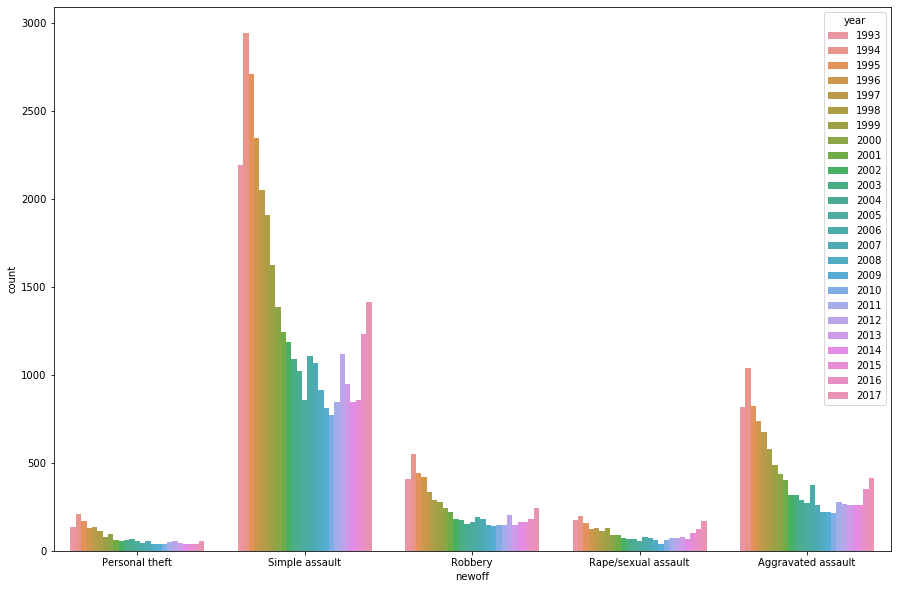

In [32]:
#results.to_csv('bjsData.csv')

#results = pd.read_csv('bjsData.csv')

#results.groupby('newoff', 'year').count()
#sns.relplot(x="year", y="year", hue="newoff", kind="line", data=results);
plt.figure(figsize=(15,10))
sns.countplot(x='newoff', hue='year', data=results)
#sns.lineplot(y=results.newoff.value_counts().index, x=results.newoff.value_counts())
#pd.value_counts(results['newoff']).plot.line()

# Conclusion
### What we see from this data is that although crime has indeed dropped overall since the beginning of the data sets in 1993, there has been a recent uptick in most categories of crime. We see the largest drop in simple assualt and the smallest drop in Rape/Sexual Assualt. This conclusion is not quite what I expected. I thought I would see a continuous decline in crime but once I saw the data, as a former resident of NYC, it anecdotally makes sense to me as it seems that crime has really been rising the last few years just from the stories that have happened to friends and family over the past few years.